In [4]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

np.random.seed(seed=456613)


# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)



In [5]:
#Display preferences
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})


In [6]:
ballot = pd.read_csv('test_data_2.csv')
ballot.head()

,key,birth_year,gender,ideo,race_4,edu,employ,party,income_pct,activist_pct,target
0,1,1962,male,-1,Latinx,non-college,1.000,Dem,0.345,0.856,nan
1,2,1972,female,-1,Latinx,non-college,1.000,Rep,0.250,0.680,nan
2,3,1962,female,1,White,college,1.000,Dem,-1.710,0.419,0.000
3,4,1983,female,0,Black,college,1.000,NaN,-0.345,0.430,1.000
4,5,1967,male,0,NaN,NaN,nan,NaN,-0.676,0.784,nan


In [7]:
ballot.isnull().sum()

key               0
birth_year        0
gender            0
ideo              0
race_4          390
edu             400
employ          404
party           496
income_pct        0
activist_pct      0
target          917
dtype: int64

In [8]:
ballot.shape

(1901, 11)

In [9]:
ballot.describe()

,key,birth_year,ideo,employ,income_pct,activist_pct,target
count,1901.000,1901.000,1901.000,1497.000,1901.000,1901.000,984.000
mean,951.000,1959.036,-0.225,0.484,0.016,0.509,0.556
std,548.916,15.532,0.870,0.500,1.020,0.286,0.497
min,1.000,1919.000,-1.000,0.000,-3.167,0.000,0.000
25%,476.000,1947.000,-1.000,0.000,-0.679,0.276,0.000
50%,951.000,1956.000,-1.000,0.000,-0.002,0.513,1.000
75%,1426.000,1969.000,1.000,1.000,0.704,0.747,1.000
max,1901.000,1998.000,1.000,1.000,3.545,1.000,1.000


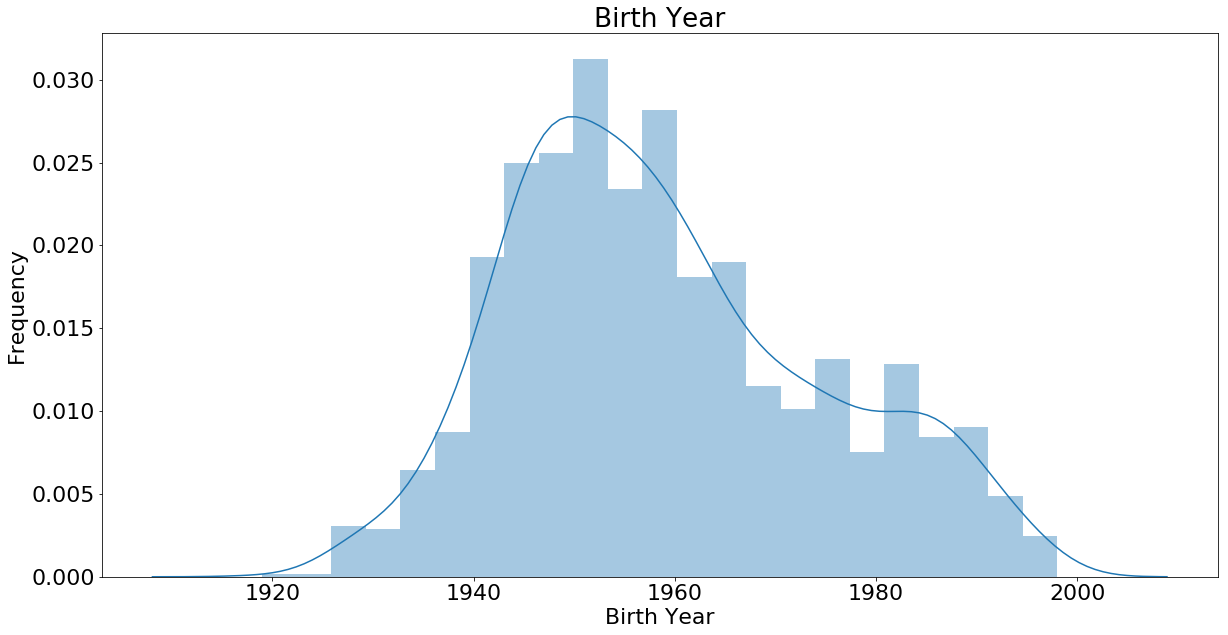

In [10]:
plt.figure(figsize=(20,10))
sns.distplot(ballot['birth_year'])
plt.title('Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()



<Figure size 1440x720 with 0 Axes>

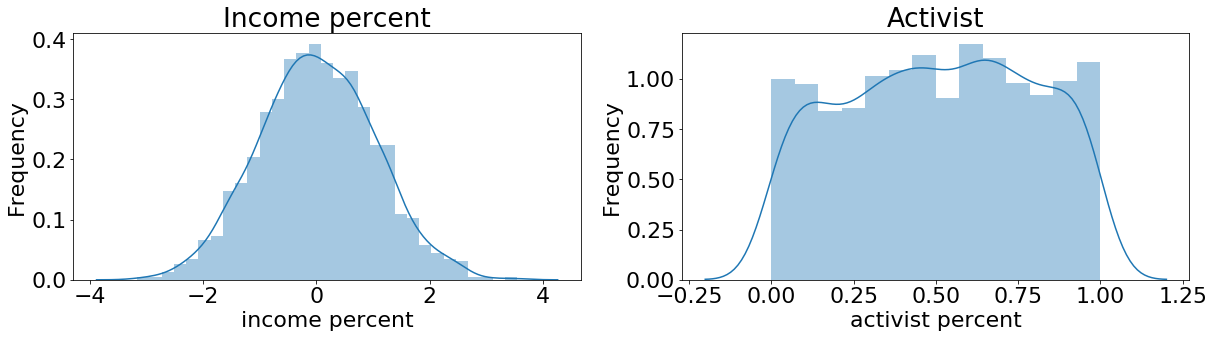

In [11]:
plt.figure(figsize=(20,10))
fig = plt.figure()


fig.add_subplot(221)
sns.distplot(ballot['income_pct'])
plt.title('Income percent')
plt.xlabel('income percent')
plt.ylabel('Frequency')

fig.add_subplot(222)
sns.distplot(ballot['activist_pct'])
plt.title('Activist')
plt.xlabel('activist percent')
plt.ylabel('Frequency')


plt.show()

**Overwhelmingly vote is associated with party. Dems vote no while Repubs vote yes.**

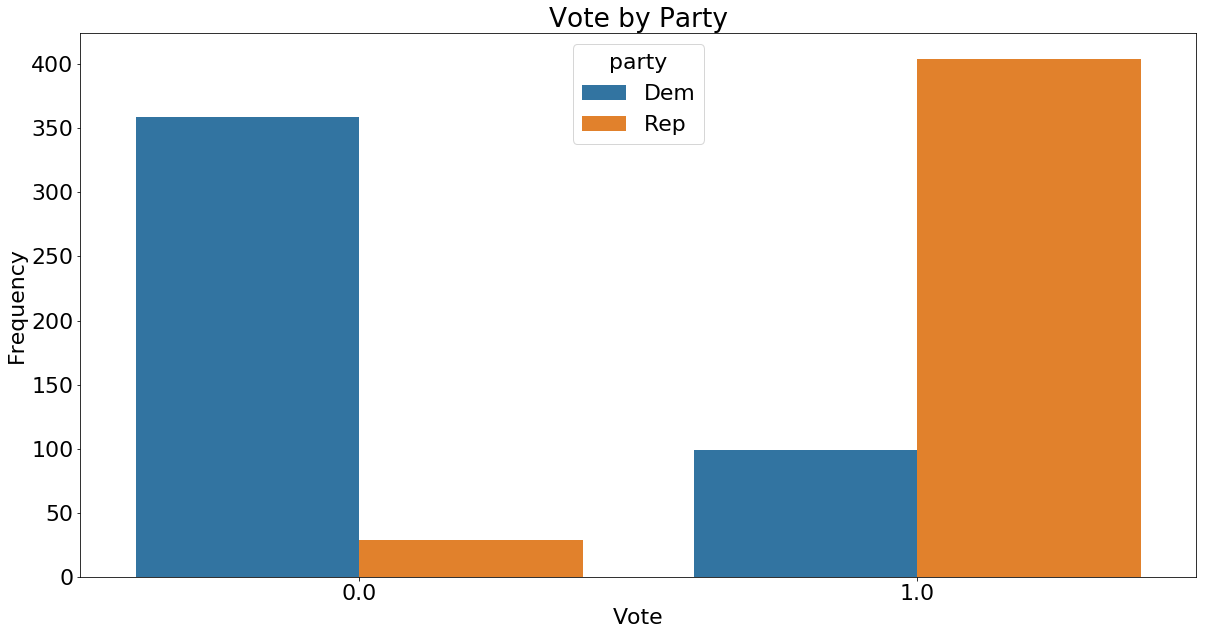

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'target', hue = 'party', data=ballot)
plt.title('Vote by Party')
plt.xlabel('Vote')
plt.ylabel('Frequency')
plt.show()

**Gender is split for yes votes. The majority of no voters are women.**

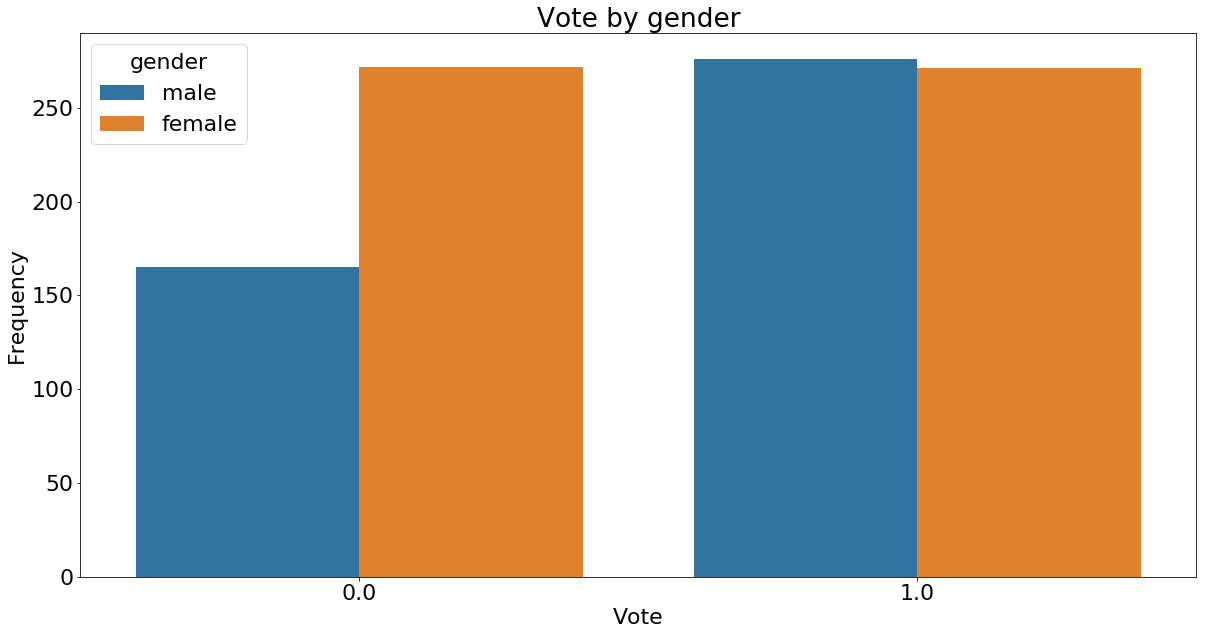

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'target', hue = 'gender', data=ballot)
plt.title('Vote by gender')
plt.xlabel('Vote')
plt.ylabel('Frequency')
plt.show()

**Yes voters tend to report they are not ideological whereas no voters tend to report they are ideological.**

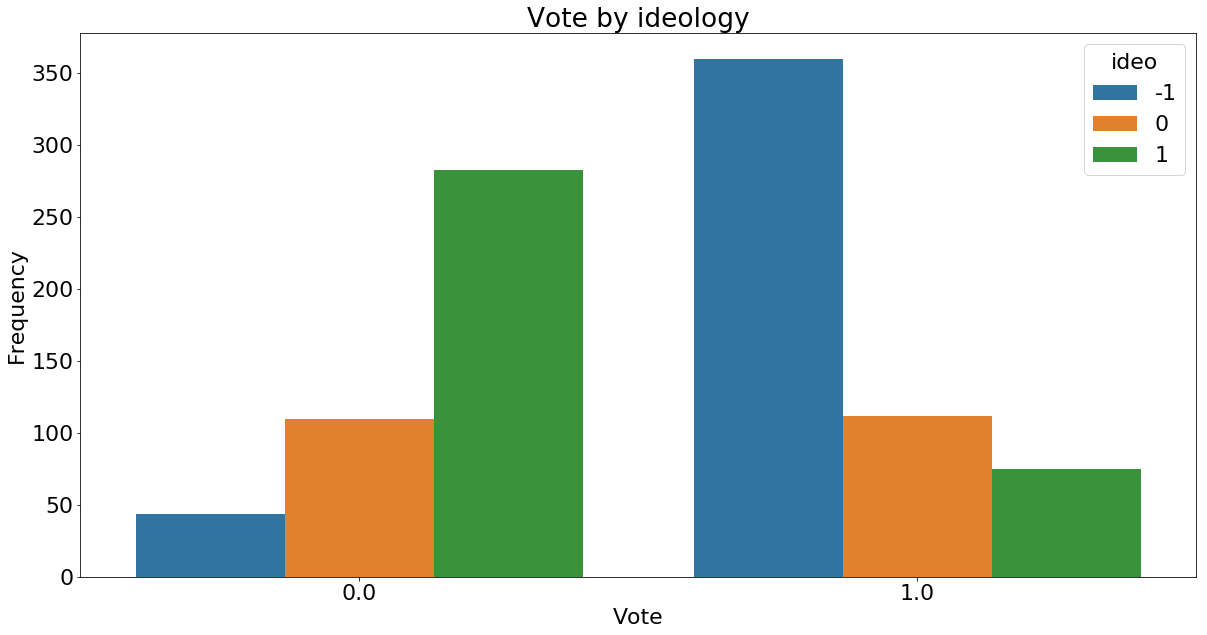

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'target', hue = 'ideo', data=ballot)
plt.title('Vote by ideology')
plt.xlabel('Vote')
plt.ylabel('Frequency')
plt.show()

**Republicans in general and particularly women are a bit older on average than democratic voters.  Republican women tend to be older than Republican men voters.**

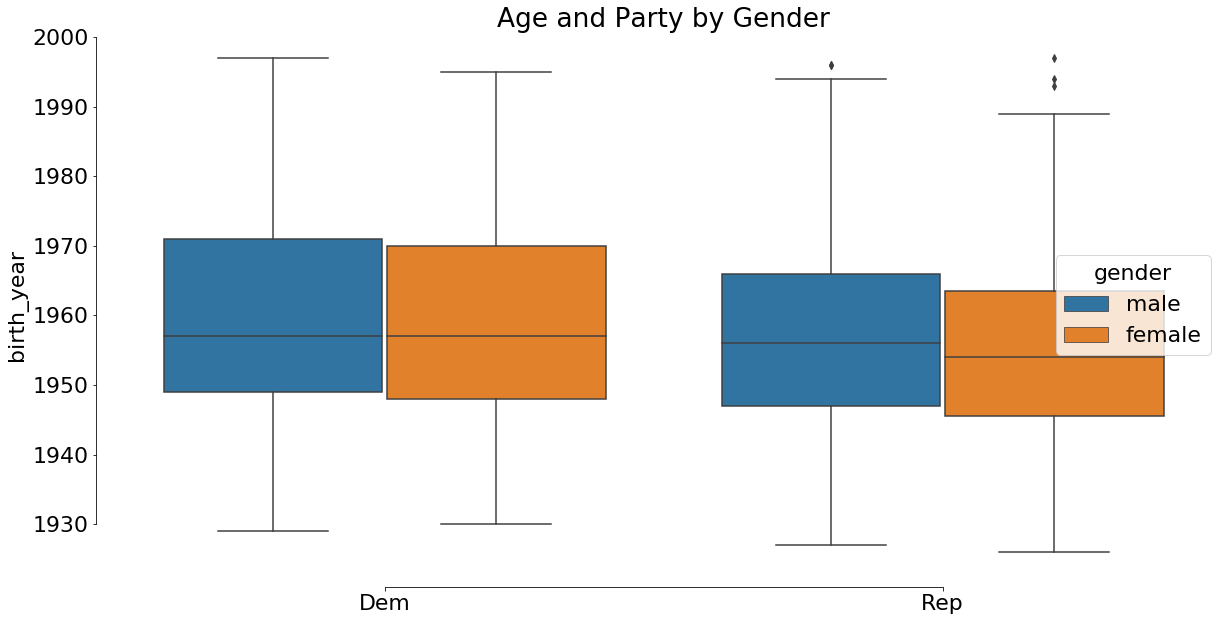

In [15]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='party', y='birth_year', hue='gender', data=ballot)
plt.title('Age and Party by Gender')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='birth_year')
plt.show()

**Black Republicans are the youngest group of voters.**

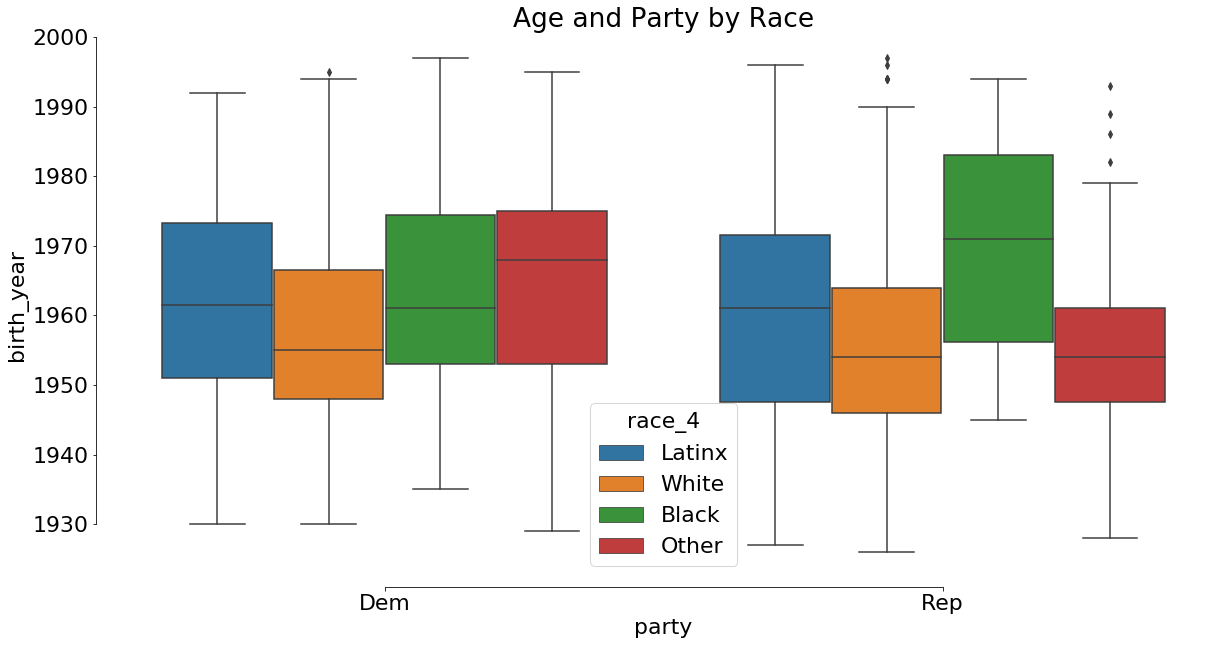

In [16]:
plt.figure(figsize=(20,10))
ax_1 = sns.boxplot(x='party', y='birth_year', hue='race_4', data=ballot)
plt.title('Age and Party by Race')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='birth_year')
plt.show()

**Democrates have more college education than Republicans.**

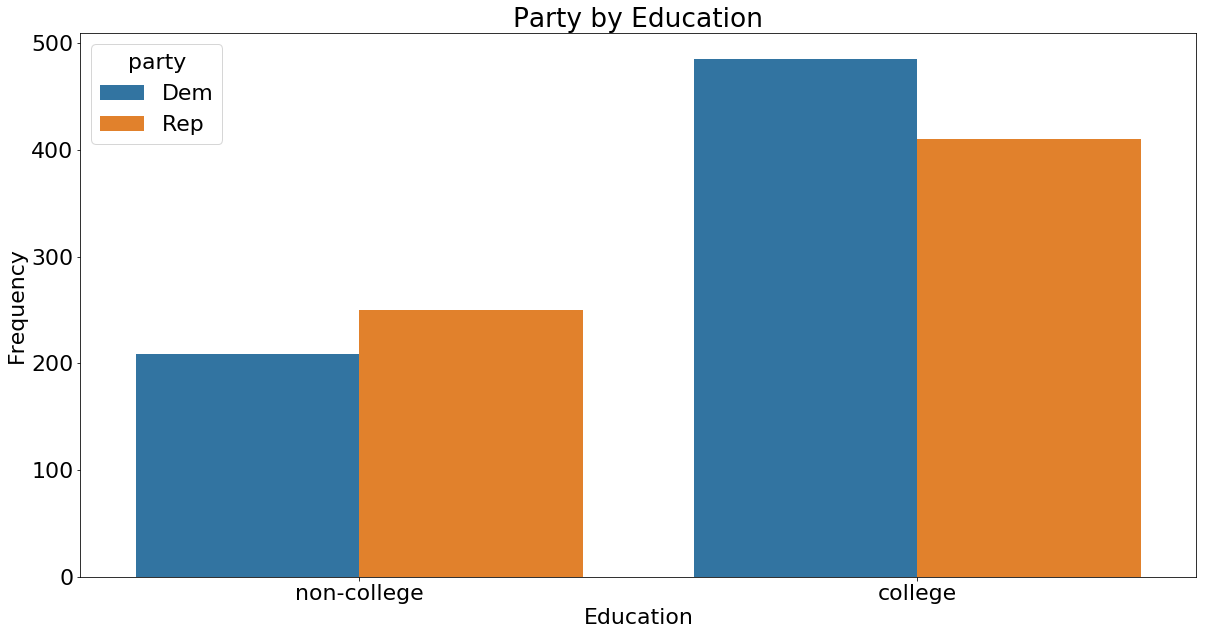

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'edu', hue = 'party', data=ballot)
plt.title('Party by Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

**In the Democratic party the majority of voters are white women.  In all racial categories in the Democratic party women are the majority of voters.  In the Republican party  men are the majority of voters, although the Republican have more gender balance than Democrats.  Black republicans make up a very small portion of voters.**  

<Figure size 1440x720 with 0 Axes>

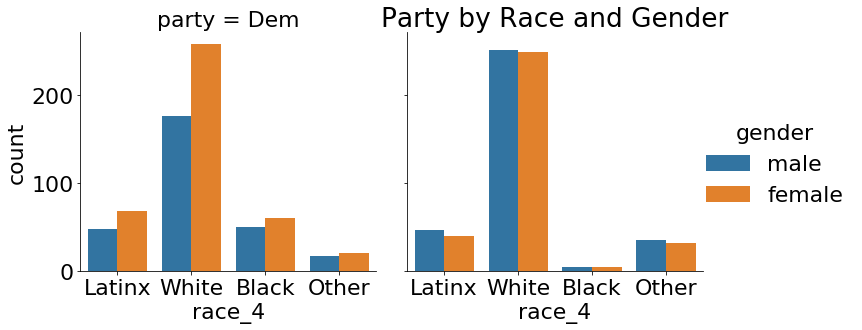

In [18]:
plt.figure(figsize=(20,10))
sns.catplot(x = 'race_4', hue = 'gender', col = 'party', data=ballot, kind = 'count')
plt.title('Party by Race and Gender')
plt.show()


**When accounting for race and education , Republican white voters have more education than white Democrats.  Black and Latinx Democratic voters have more education than their Republican counterparts. With the largest educational difference among Black voters**

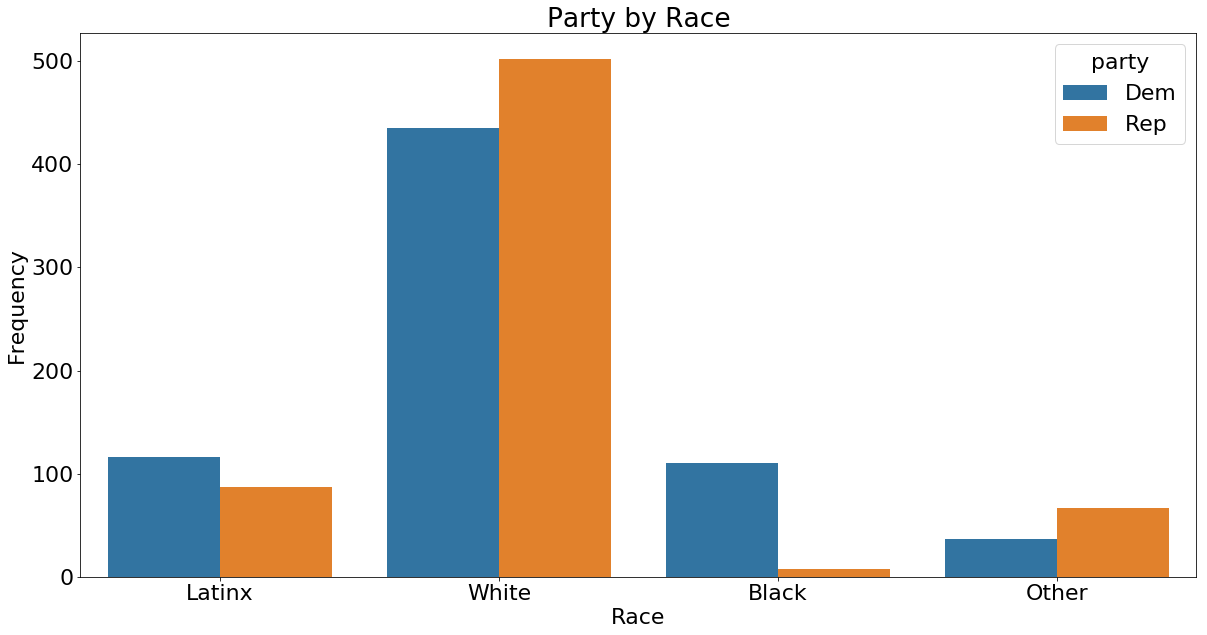

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'race_4', hue = 'party', data=ballot)
plt.title('Party by Race')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

**Most voters report either strong ideology or weak ideology - fewer voters find themselves in the middle.**

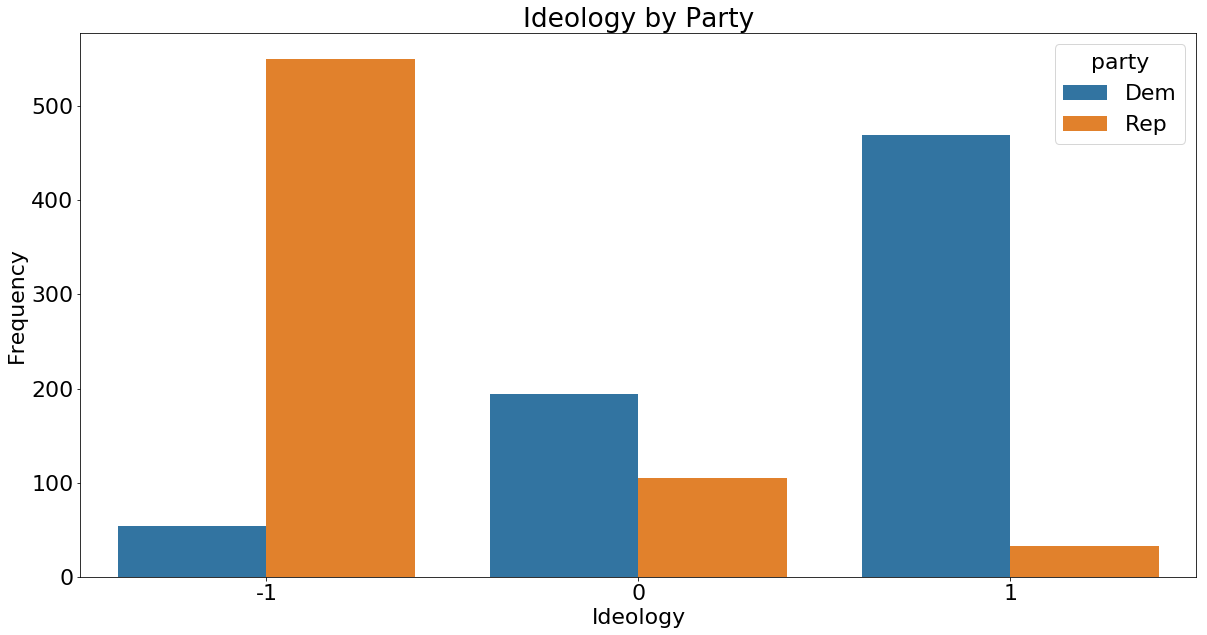

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'ideo', hue = 'party', data=ballot)
plt.title('Ideology by Party')
plt.xlabel('Ideology')
plt.ylabel('Frequency')
plt.show()

**There is no relationship between income, race and activist.**

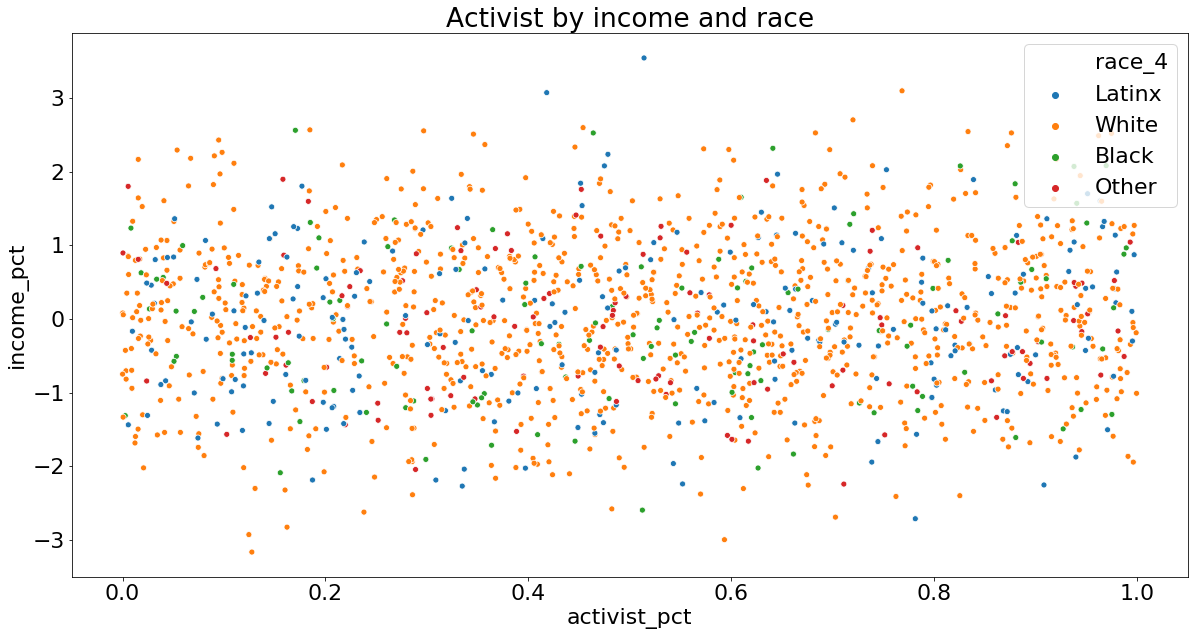

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'activist_pct', y= 'income_pct', hue = 'race_4', data=ballot)
plt.title('Activist by income and race')
plt.show()

**There is no relationship between Activist and income**

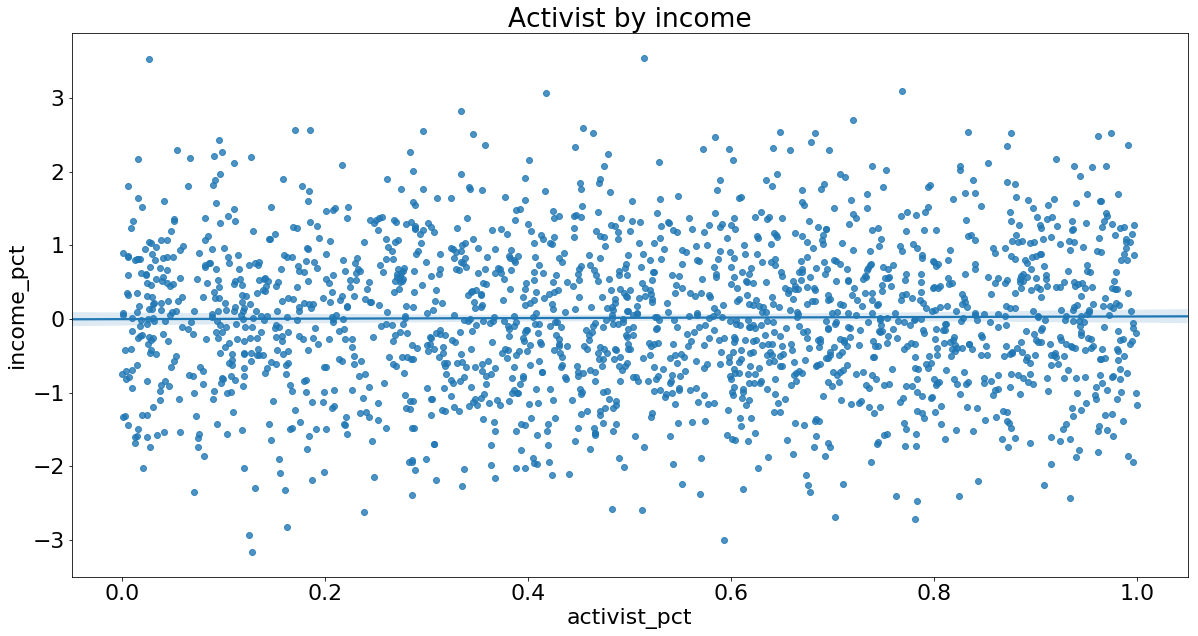

In [22]:
plt.figure(figsize=(20,10))
sns.regplot(x = 'activist_pct', y= 'income_pct', data=ballot)
plt.title('Activist by income')
plt.show()

**Black Republicans (who voted yes) tend to have lower income**

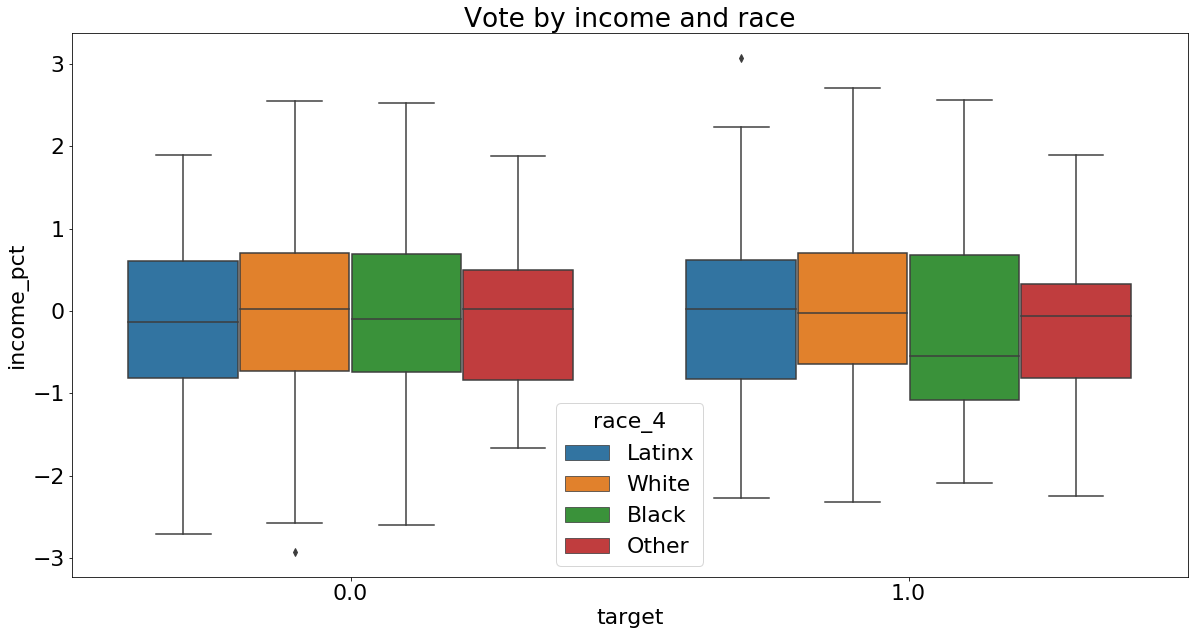

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x='target', y='income_pct', hue='race_4', data=ballot)
plt.title('Vote by income and race')
plt.show()

**People who votes yes tend to be more identified with some sort of activism than those who voted no.  The is true across parties**

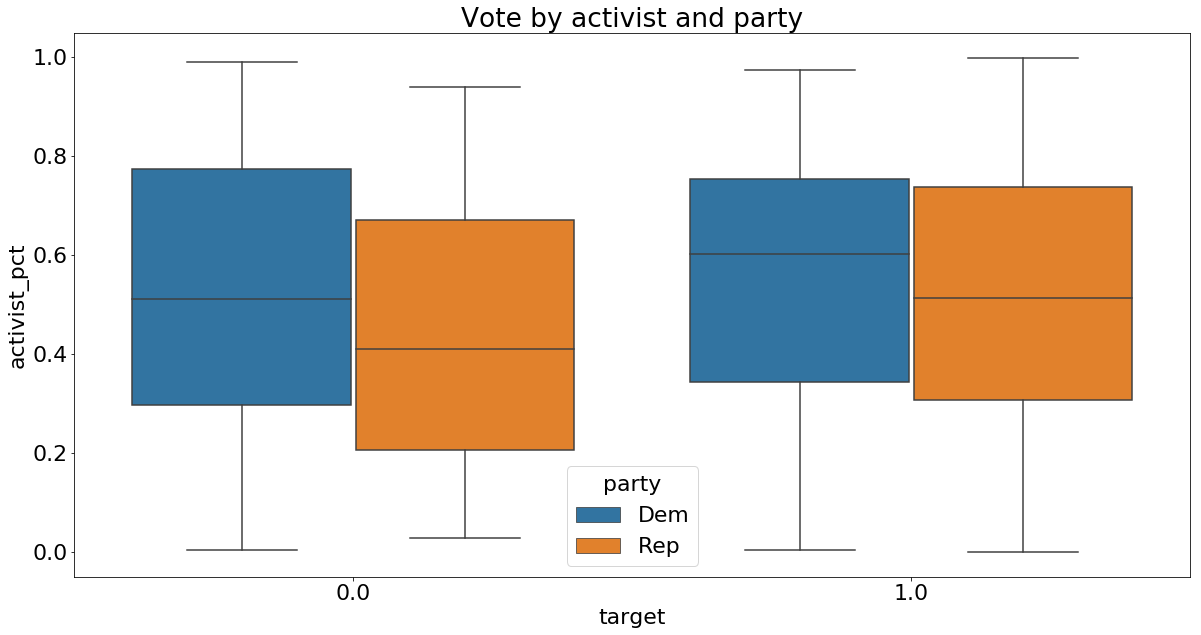

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x='target', y='activist_pct', hue='party', data=ballot)
plt.title('Vote by activist and party')
plt.show()

In [25]:
corrmat = ballot.corr()
print(corrmat)

                key  birth_year   ideo  employ  income_pct  activist_pct  \
key           1.000       0.161 -0.000  -0.035      -0.011         0.002   
birth_year    0.161       1.000  0.083   0.497      -0.009        -0.036   
ideo         -0.000       0.083  1.000   0.024      -0.008         0.022   
employ       -0.035       0.497  0.024   1.000      -0.041        -0.019   
income_pct   -0.011      -0.009 -0.008  -0.041       1.000         0.010   
activist_pct  0.002      -0.036  0.022  -0.019       0.010         1.000   
target       -0.012      -0.141 -0.604  -0.051       0.004         0.023   

              target  
key           -0.012  
birth_year    -0.141  
ideo          -0.604  
employ        -0.051  
income_pct     0.004  
activist_pct   0.023  
target         1.000  


<Figure size 1440x720 with 0 Axes>

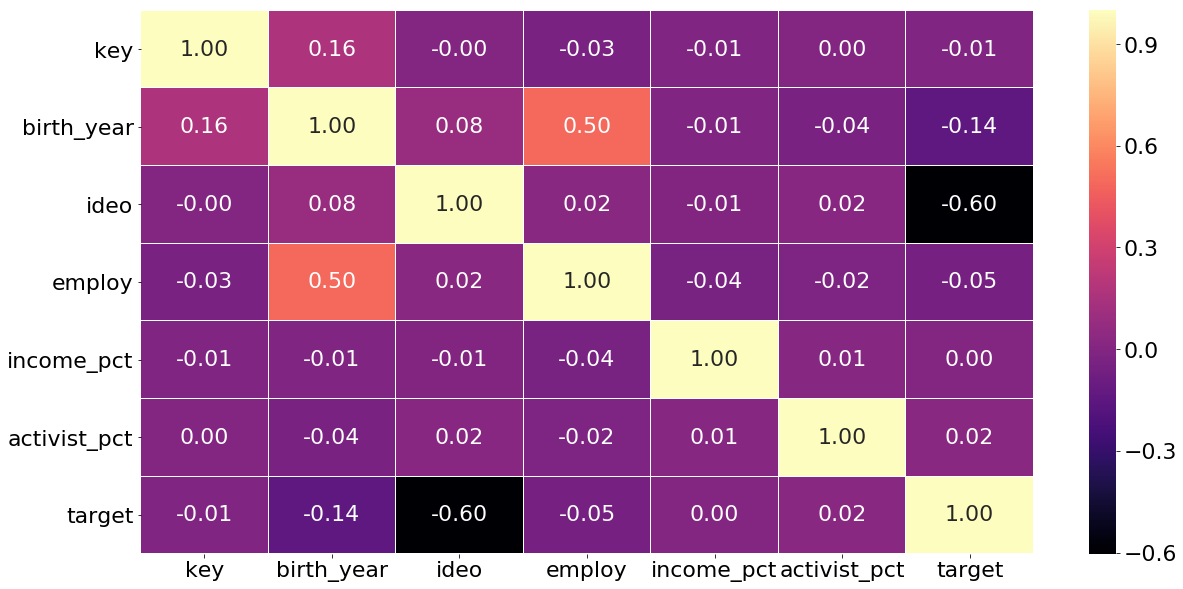

In [26]:
plt.figure(figsize=(20,10))
fig,ax = plt.subplots()
sns.heatmap(ballot.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [27]:
def age_range(ballot):
    if (ballot.birth_year >= 1940) & (ballot.birth_year <= 1964):
        ballot['generation'] = 'Boomer'
    elif (ballot.birth_year >=1965) & (ballot.birth_year <=1979):
        ballot['generation'] = 'Gen_X'
    else: ballot['generation'] = 'Millenial'

    return ballot

ballot = ballot.apply(age_range, axis=1)
ballot.head()

,key,birth_year,gender,ideo,race_4,edu,employ,party,income_pct,activist_pct,target,generation
0,1,1962,male,-1,Latinx,non-college,1.000,Dem,0.345,0.856,nan,Boomer
1,2,1972,female,-1,Latinx,non-college,1.000,Rep,0.250,0.680,nan,Gen_X
2,3,1962,female,1,White,college,1.000,Dem,-1.710,0.419,0.000,Boomer
3,4,1983,female,0,Black,college,1.000,NaN,-0.345,0.430,1.000,Millenial
4,5,1967,male,0,NaN,NaN,nan,NaN,-0.676,0.784,nan,Gen_X


**Baby boomers are more likely to be voters.  Among Democrats, women across all generations are more likely to be voters. Among Milenials in the Democratic party gender difference matters less.  Among Republicans gender matters less except for Milenials in the Republican party where men are more likely to vote.**  

<Figure size 1440x720 with 0 Axes>

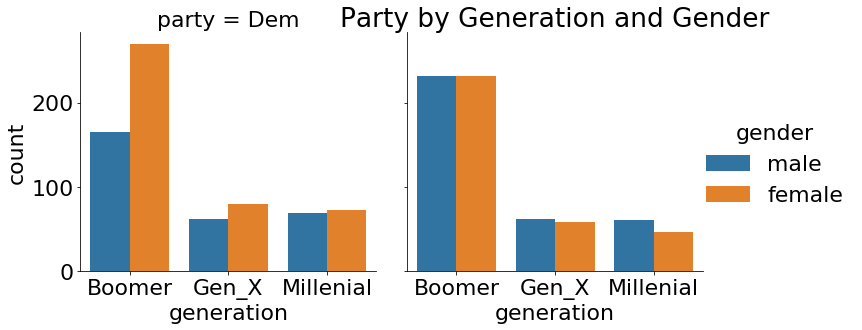

In [28]:
plt.figure(figsize=(20,10))
sns.catplot(x = 'generation', hue = 'gender', col = 'party', data=ballot, kind = 'count')
plt.title('Party by Generation and Gender')
plt.show()

In [29]:
ballot = pd.get_dummies(ballot, columns=['gender','party','edu'], drop_first = True)

In [30]:
ballot.head()

,key,birth_year,ideo,race_4,employ,income_pct,activist_pct,target,generation,gender_male,party_Rep,edu_non-college
0,1,1962,-1,Latinx,1.000,0.345,0.856,nan,Boomer,1,0,1
1,2,1972,-1,Latinx,1.000,0.250,0.680,nan,Gen_X,0,1,1
2,3,1962,1,White,1.000,-1.710,0.419,0.000,Boomer,0,0,0
3,4,1983,0,Black,1.000,-0.345,0.430,1.000,Millenial,0,0,0
4,5,1967,0,NaN,nan,-0.676,0.784,nan,Gen_X,1,0,0


In [31]:
ballot = pd.get_dummies(ballot, columns=['race_4'])

In [32]:
ballot.head()

,key,birth_year,ideo,employ,income_pct,activist_pct,target,generation,gender_male,party_Rep,edu_non-college,race_4_Black,race_4_Latinx,race_4_Other,race_4_White
0,1,1962,-1,1.000,0.345,0.856,nan,Boomer,1,0,1,0,1,0,0
1,2,1972,-1,1.000,0.250,0.680,nan,Gen_X,0,1,1,0,1,0,0
2,3,1962,1,1.000,-1.710,0.419,0.000,Boomer,0,0,0,0,0,0,1
3,4,1983,0,1.000,-0.345,0.430,1.000,Millenial,0,0,0,1,0,0,0
4,5,1967,0,nan,-0.676,0.784,nan,Gen_X,1,0,0,0,0,0,0


In [33]:
ballot = pd.get_dummies(ballot, columns=['generation'])

In [34]:
ballot.head()

,key,birth_year,ideo,employ,income_pct,activist_pct,target,gender_male,party_Rep,edu_non-college,race_4_Black,race_4_Latinx,race_4_Other,race_4_White,generation_Boomer,generation_Gen_X,generation_Millenial
0,1,1962,-1,1.000,0.345,0.856,nan,1,0,1,0,1,0,0,1,0,0
1,2,1972,-1,1.000,0.250,0.680,nan,0,1,1,0,1,0,0,0,1,0
2,3,1962,1,1.000,-1.710,0.419,0.000,0,0,0,0,0,0,1,1,0,0
3,4,1983,0,1.000,-0.345,0.430,1.000,0,0,0,1,0,0,0,0,0,1
4,5,1967,0,nan,-0.676,0.784,nan,1,0,0,0,0,0,0,0,1,0


In [35]:
#drop non to only see known vote
ballot = ballot.dropna()

In [36]:
ballot.head()

,key,birth_year,ideo,employ,income_pct,activist_pct,target,gender_male,party_Rep,edu_non-college,race_4_Black,race_4_Latinx,race_4_Other,race_4_White,generation_Boomer,generation_Gen_X,generation_Millenial
2,3,1962,1,1.000,-1.710,0.419,0.000,0,0,0,0,0,0,1,1,0,0
3,4,1983,0,1.000,-0.345,0.430,1.000,0,0,0,1,0,0,0,0,0,1
8,9,1970,-1,1.000,1.525,0.794,1.000,1,1,1,0,0,0,1,0,1,0
11,12,1945,-1,0.000,-1.004,0.384,1.000,0,1,1,0,0,0,1,1,0,0
12,13,1943,-1,0.000,0.419,0.722,1.000,1,1,0,0,0,0,1,1,0,0


In [37]:
ballot.drop('key', axis=1, inplace=True)

In [38]:
ballot.head()

,birth_year,ideo,employ,income_pct,activist_pct,target,gender_male,party_Rep,edu_non-college,race_4_Black,race_4_Latinx,race_4_Other,race_4_White,generation_Boomer,generation_Gen_X,generation_Millenial
2,1962,1,1.000,-1.710,0.419,0.000,0,0,0,0,0,0,1,1,0,0
3,1983,0,1.000,-0.345,0.430,1.000,0,0,0,1,0,0,0,0,0,1
8,1970,-1,1.000,1.525,0.794,1.000,1,1,1,0,0,0,1,0,1,0
11,1945,-1,0.000,-1.004,0.384,1.000,0,1,1,0,0,0,1,1,0,0
12,1943,-1,0.000,0.419,0.722,1.000,1,1,0,0,0,0,1,1,0,0


In [39]:
ballot.columns

Index(['birth_year', 'ideo', 'employ', 'income_pct', 'activist_pct', 'target',
       'gender_male', 'party_Rep', 'edu_non-college', 'race_4_Black',
       'race_4_Latinx', 'race_4_Other', 'race_4_White', 'generation_Boomer',
       'generation_Gen_X', 'generation_Millenial'],
      dtype='object')

# Logistic Regression

In [40]:
#define X and target variable
X = ballot.drop(['target', 'birth_year'], 1)
y = ballot['target']

In [41]:
# Fit the model
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.396013
         Iterations 8
                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.423      
Dependent Variable:         target                 AIC:                    792.6817   
Date:                       2019-06-12 13:17       BIC:                    856.0597   
No. Observations:           968                    Log-Likelihood:         -383.34    
Df Model:                   12                     LL-Null:                -664.93    
Df Residuals:               955                    LLR p-value:            7.6632e-113
Converged:                  1.0000                 Scale:                  1.0000     
No. Iterations:             8.0000                                                    
--------------------------------------------------------------------------------------
                      Coef.     Std.Err.      z    P>|z|      [0

In [42]:
lr = LogisticRegression(C=1e9)
X = ballot.drop(['target', 'birth_year'], 1)
y = ballot['target']


# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by vote status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

scores = cross_val_score(lr, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Coefficients
[[-0.87019819 -0.07234698  0.01874523  0.59859478  0.57822336  2.73131289
  -0.33961621 -0.49616747 -0.29204437  0.18239564 -0.1305535  -0.04232336
  -0.30645107 -0.38759526]]
[-0.7363697]

 Accuracy by vote status
target  0.000  1.000
row_0               
0.000     383    119
1.000      47    419

 Percentage accuracy
0.8285123966942148
[0.79381443 0.80412371 0.8556701  0.86597938 0.83505155 0.83505155
 0.79381443 0.80412371 0.79166667 0.84375   ]
0.8223045532646047
Accuracy: 0.82 (+/- 0.05)


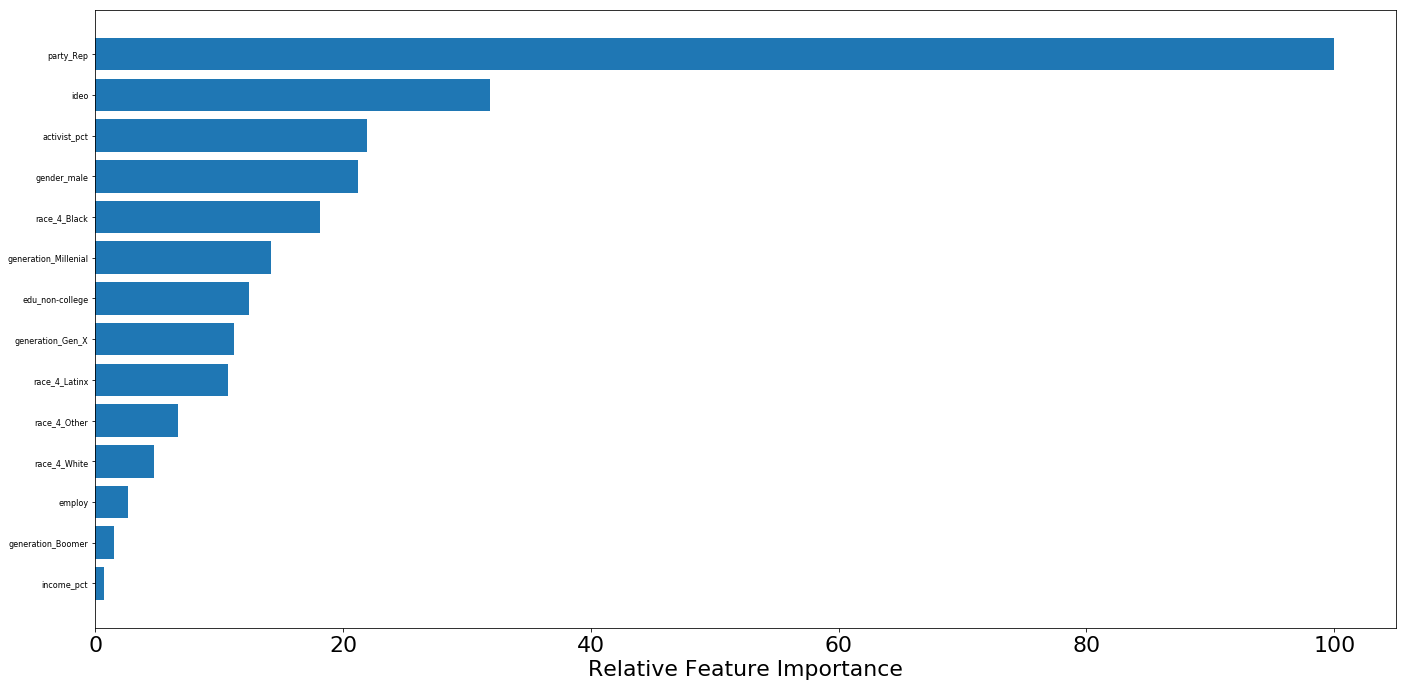

In [43]:
#See what features are most important 
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [46]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[115  20]
 [ 31 125]]


In [47]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.85      0.82       135
        1.0       0.86      0.80      0.83       156

avg / total       0.83      0.82      0.82       291



In [48]:
#dropping statistically insignificant features

# Model Used For The Test

In [49]:
X_1 = ballot.drop(['target', 'birth_year', 'race_4_Black', 'race_4_Latinx', 'race_4_Other', 'race_4_White', 'generation_Boomer',
                  'generation_Gen_X' ,'generation_Millenial'], 1)
y = ballot['target']

In [50]:
logit_model=sm.Logit(y,X_1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.408151
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.406      
Dependent Variable: target           AIC:              804.1802   
Date:               2019-06-12 13:17 BIC:              838.3068   
No. Observations:   968              Log-Likelihood:   -395.09    
Df Model:           6                LL-Null:          -664.93    
Df Residuals:       961              LLR p-value:      2.3702e-113
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
ideo               -0.9833   0.1234 -7.9689 0.0000 -1.2252 -0.7415
employ             -0.4663   0.1688 -2.7630 0.0057 -0

In [51]:
# Fit the model.
fit = lr.fit(X_1, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_1)

print('\n Accuracy by vote status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X_1, y))

scores = cross_val_score(lr, X_1, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Coefficients
[[-0.85920533 -0.17716787  0.02765565  0.66798422  0.52622676  2.8115343
  -0.34459911]]
[-1.06323082]

 Accuracy by vote status
target  0.000  1.000
row_0               
0.000     381    120
1.000      49    418

 Percentage accuracy
0.8254132231404959
[0.79381443 0.79381443 0.84536082 0.87628866 0.84536082 0.83505155
 0.80412371 0.79381443 0.78125    0.85416667]
0.8223045532646047
Accuracy: 0.82 (+/- 0.06)


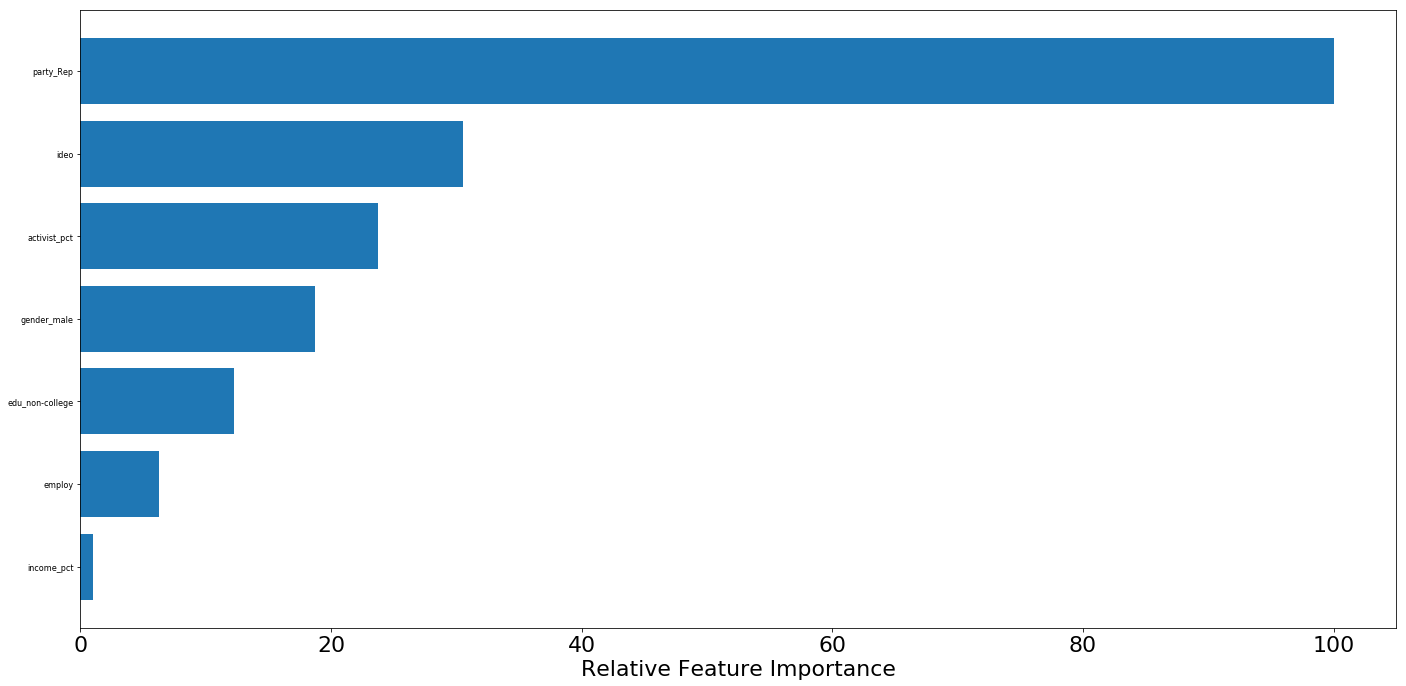

In [52]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [53]:
X_1train, X_1test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_1train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred = logreg.predict(X_1test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_1test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [55]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.86      0.82       135
        1.0       0.87      0.80      0.83       156

avg / total       0.83      0.83      0.83       291



# F1 score: 0.83

# Random Forest

In [56]:
rfc = ensemble.RandomForestClassifier()
X = ballot.drop(['target', 'birth_year'], 1)
y = ballot['target']
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
scores = cross_val_score(rfc, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.77319588 0.77319588 0.88659794 0.79381443 0.80412371 0.74226804
 0.75257732 0.81443299 0.75       0.79166667]
0.7881872852233678
Accuracy: 0.79 (+/- 0.08)


In [58]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [59]:
feat_labels = ['ideo', 'employ', 'income_pct', 'activist_pct',
       'gender_male', 'party_Rep', 'edu_non-college', 'race_4_Black',
       'race_4_Latinx', 'race_4_Other', 'race_4_White']

In [60]:
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('ideo', 0.22109590619223715)
('employ', 0.022685562377043552)
('income_pct', 0.18153083132249972)
('activist_pct', 0.1819250787417387)
('gender_male', 0.026906331833255893)
('party_Rep', 0.2458204754604508)
('edu_non-college', 0.025241596651610642)
('race_4_Black', 0.014248296356518905)
('race_4_Latinx', 0.014899494629163165)
('race_4_Other', 0.01062922131327319)
('race_4_White', 0.01860020058975951)


## Most important features are Political Party and Ideology

In [61]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(rfc, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.15)

In [62]:
# Transform the data to create a new dataset containing only the most important features
# Note: Apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [63]:
# Create a new random forest classifier for the most important features
rfc_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rfc_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = rfc_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.7783505154639175

# SVM

In [65]:
#Fit model - Support Vector Machine
X = ballot.drop(['target', 'birth_year'], 1)
y = ballot['target']
svm = SVC(kernel = 'linear')
svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
svm.score(X, y)

0.8254132231404959

In [67]:
scores = cross_val_score(svm, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.79381443 0.79381443 0.8556701  0.86597938 0.84536082 0.83505155
 0.80412371 0.84536082 0.77083333 0.84375   ]
0.8253758591065292
Accuracy: 0.83 (+/- 0.06)


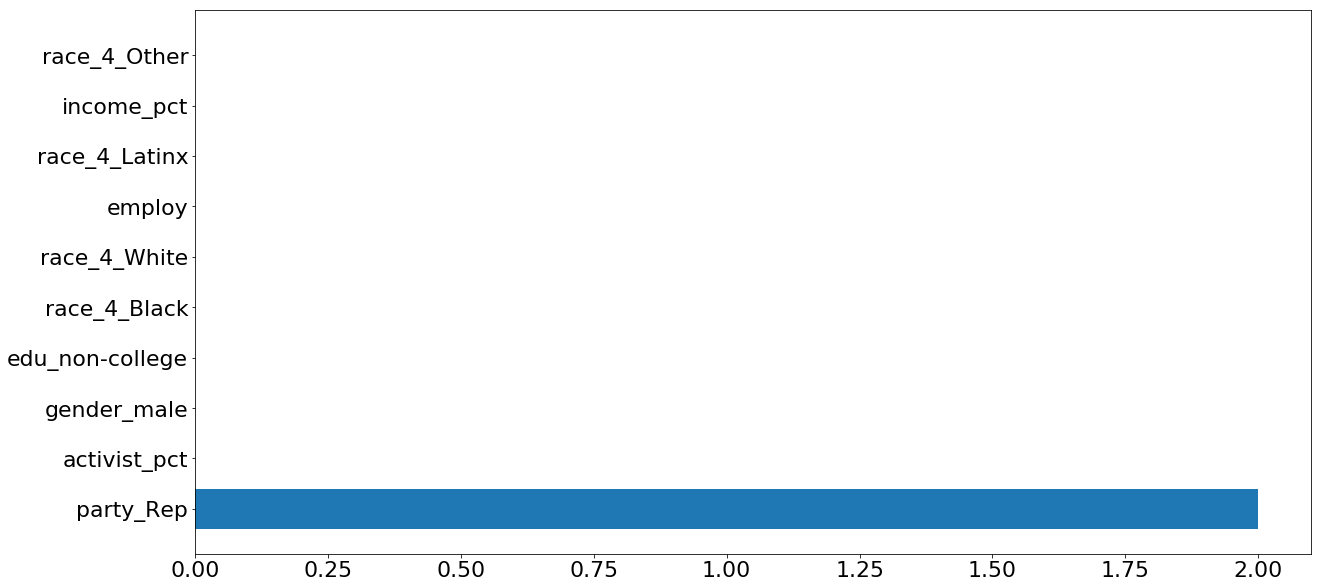

In [68]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

features_names = ['ideo', 'employ', 'income_pct', 'activist_pct',
       'gender_male', 'party_Rep', 'edu_non-college', 'race_4_Black',
       'race_4_Latinx', 'race_4_Other', 'race_4_White']
svm = SVC(kernel = 'linear')
svm.fit(X, y)

# Specify top n features to visualize.
f_importances(abs(svm.coef_[0]), features_names, top=10)